# RNN

In [1]:
import keras.layers
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt

2022-12-05 21:36:32.185024: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 21:36:32.589648: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-05 21:36:32.589666: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-05 21:36:32.653252: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-05 21:36:33.736261: W tensorflow/stream_executor/platform/de

In [2]:
max_features = 20000
max_len = 300
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
x_train.shape, x_test.shape

((25000, 300), (25000, 300))

In [3]:
model_layers = [
    Embedding(max_features, 16, mask_zero=True),
    LSTM(32, input_shape=(max_features,max_len), kernel_regularizer="l2"),
    keras.layers.Dropout(0.1),
    Dense(1, activation='sigmoid'),
]
model = Sequential(model_layers)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

2022-12-05 21:36:39.309123: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-05 21:36:39.309406: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-05 21:36:39.309427: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kamilasproska-VivoBook-ASUSLaptop-X515UA-M515UA): /proc/driver/nvidia/version does not exist
2022-12-05 21:36:39.309916: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                6272      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 326,305
Trainable params: 326,305
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 163s 205ms/step - loss: 0.4553 - accuracy: 0.8039 - val_loss: 0.3509 - val_accuracy: 0.8633
Epoch 2/5
782/782 [==============================] - 828s 1s/step - loss: 0.2434 - accuracy: 0.9174 - val_loss: 0.3173 - val_accuracy: 0.8759
Epoch 3/5
782/782 [==============================] - 932s 1s/step - loss: 0.1748 - accuracy: 0.9443 - val_loss: 0.3967 - val_accuracy: 0.8635
Epoch 4/5
782/782 [==============================] - 921s 1s/step - loss: 0.1378 - accuracy: 0.9590 - val_loss: 0.3832 - val_accuracy: 0.8656
Epoch 5/5
782/782 [==============================] - 902s 1s/step - loss: 0.1233 - accuracy: 0.9638 - val_loss: 0.3924 - val_accuracy: 0.8604


In [5]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.455272,0.80392,0.350892,0.86328
1,0.243367,0.91736,0.317346,0.87588
2,0.174844,0.94428,0.396709,0.86348
3,0.137825,0.95896,0.383236,0.86560
4,0.123256,0.96376,0.392436,0.86036


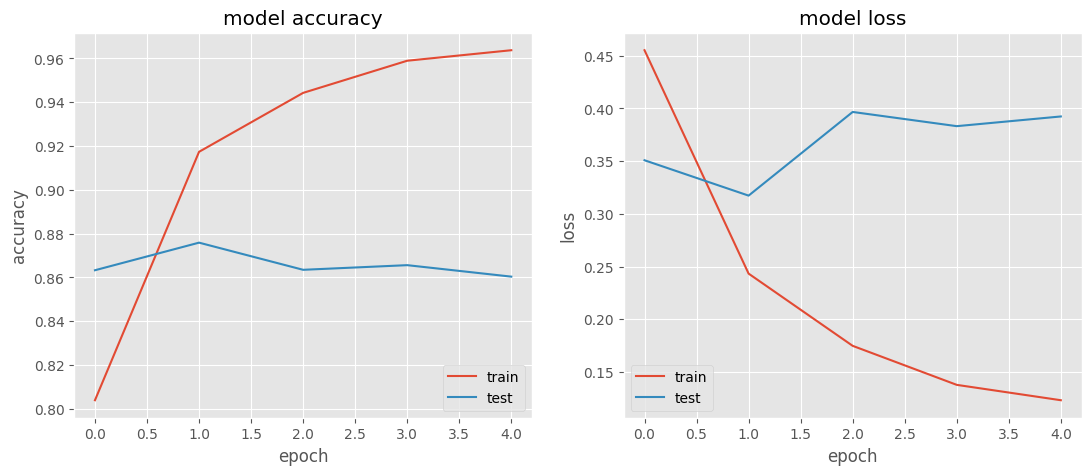

In [6]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

plt.sca(axis[0])
# plt.ylim(0, 1)
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="test")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')

plt.sca(axis[1])
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="test")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower left');